In [39]:
import pandas as pd
import matplotlib.pyplot as plt


In [40]:
# Load the Excel file
file_path = 'AVL_STM24_Vehicle_CoastDown_EXERCISE_04122024.xlsx'
excel_data = pd.ExcelFile(file_path)

# Check sheet names
sheet_names = excel_data.sheet_names
sheet_names


['Intro', 'Vehicle 1', 'Vehicle 2', 'Vehicle 3', 'New_V1', 'New_V2', 'New V3']

In [41]:
# Load specific sheets into DataFrames
sheets_to_load = ['New_V1', 'New_V2', 'New V3']
data = {sheet: excel_data.parse(sheet) for sheet in sheets_to_load}

# Display first few rows of each sheet to confirm the structure
for sheet, df in data.items():
    print(f"Sheet: {sheet}")
    print(df.head(), "\n")


Sheet: New_V1
   Time     SPEED  F_DYNO_MEASURED  Coeficent A  Coefficent B  Coefficent C  \
0  63.4  125.1413        -205.5464        218.1         -0.79          0.04   
1  63.5  125.4984        -214.4320        218.1         -0.79          0.04   
2  63.6  125.8586        -215.9695        218.1         -0.79          0.04   
3  63.7  126.2206        -205.3986        218.1         -0.79          0.04   
4  63.8  126.5774        -212.2947        218.1         -0.79          0.04   

    F Street        Fdyno  Absolute of F_Dyno_measured  
0  745.652172  540.105772                     205.5464  
1  748.950200  534.518200                     214.4320  
2  752.287194  536.317694                     215.9695  
3  755.651321  550.252721                     205.3986  
4  758.977382  546.682682                     212.2947   

Sheet: New_V2
   Time    SPEED  F_DYNO_MEASURED  Coeficent A  Coefficent B  Coefficent C  \
0  67.1  125.162         -291.581        192.4         -0.52          0.03 

In [42]:
# Display column names for each sheet
for sheet, df in data.items():
    print(f"Columns in sheet {sheet}: {df.columns.tolist()}")


Columns in sheet New_V1: ['Time', 'SPEED', 'F_DYNO_MEASURED', 'Coeficent A', 'Coefficent B', 'Coefficent C', 'F Street ', 'Fdyno', 'Absolute of F_Dyno_measured']
Columns in sheet New_V2: ['Time', 'SPEED', 'F_DYNO_MEASURED', 'Coeficent A', 'Coefficent B', 'Coefficent C', 'F Street ', 'Fdyno', 'Absolute of F_Dyno_measured']
Columns in sheet New V3: ['Time', 'SPEED', 'F_DYNO_MEASURED', 'Coeficent A', 'Coefficent B', 'Coefficent C', 'F Street ', 'Fdyno', 'Absolute of F_Dyno_measured']


In [43]:
# Correct the column names if necessary
for sheet, df in data.items():
    df.columns = df.columns.str.strip()  # Strip leading/trailing spaces
    print(f"Corrected columns in sheet {sheet}: {df.columns.tolist()}")


Corrected columns in sheet New_V1: ['Time', 'SPEED', 'F_DYNO_MEASURED', 'Coeficent A', 'Coefficent B', 'Coefficent C', 'F Street', 'Fdyno', 'Absolute of F_Dyno_measured']
Corrected columns in sheet New_V2: ['Time', 'SPEED', 'F_DYNO_MEASURED', 'Coeficent A', 'Coefficent B', 'Coefficent C', 'F Street', 'Fdyno', 'Absolute of F_Dyno_measured']
Corrected columns in sheet New V3: ['Time', 'SPEED', 'F_DYNO_MEASURED', 'Coeficent A', 'Coefficent B', 'Coefficent C', 'F Street', 'Fdyno', 'Absolute of F_Dyno_measured']


In [44]:
columns_to_extract = ['Correct_Column1', 'Correct_Column2', 'Correct_Column3', 'Correct_Column4']


In [45]:
# Extract necessary columns from each sheet and store in arrays
columns_to_extract = ['F Street', 'Fdyno', 'Absolute of F_Dyno_measured', 'SPEED']
data_arrays = {}

for sheet, df in data.items():
    # Ensure all necessary columns are present
    if all(col in df.columns for col in columns_to_extract):
        # Extract the columns
        data_arrays[sheet] = {
            "F Street": df['F Street'].values,
            "Fdyno": df['Fdyno'].values,
            "Absolute of F_Dyno_measured": df['Absolute of F_Dyno_measured'].values,
            "SPEED": df['SPEED'].values,
        }
    else:
        print(f"Sheet {sheet} is missing required columns.")

# Check extracted data structure
data_arrays.keys()


dict_keys(['New_V1', 'New_V2', 'New V3'])

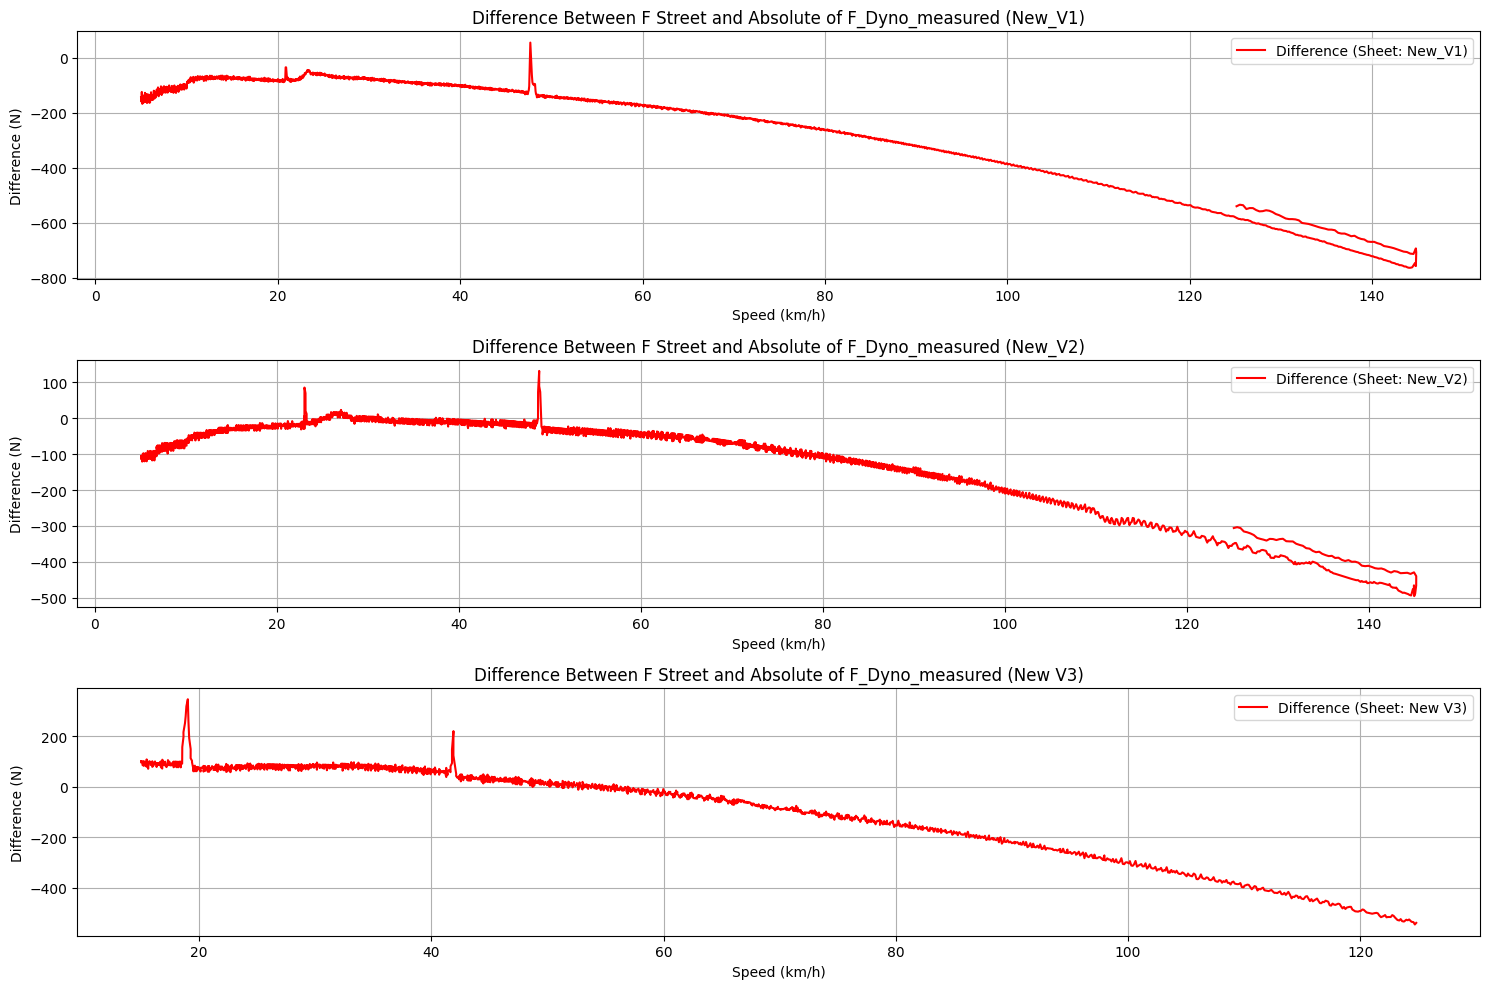

In [46]:
# Initialize the plot
plt.figure(figsize=(15, 10))

# Iterate over the sheets and plot the difference
for i, (sheet, arrays) in enumerate(data_arrays.items(), start=1):
    # Calculate the difference between Absolute of F_Dyno_measured and F Street
    difference = arrays["Absolute of F_Dyno_measured"] - arrays["F Street"]
    
    # Plot the difference
    plt.subplot(3, 1, i)
    plt.plot(arrays["SPEED"], difference, label=f'Difference (Sheet: {sheet})', color='red')
    plt.title(f'Difference Between F Street and Absolute of F_Dyno_measured ({sheet})')
    plt.xlabel('Speed (km/h)')
    plt.ylabel('Difference (N)')
    plt.legend()
    plt.grid()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


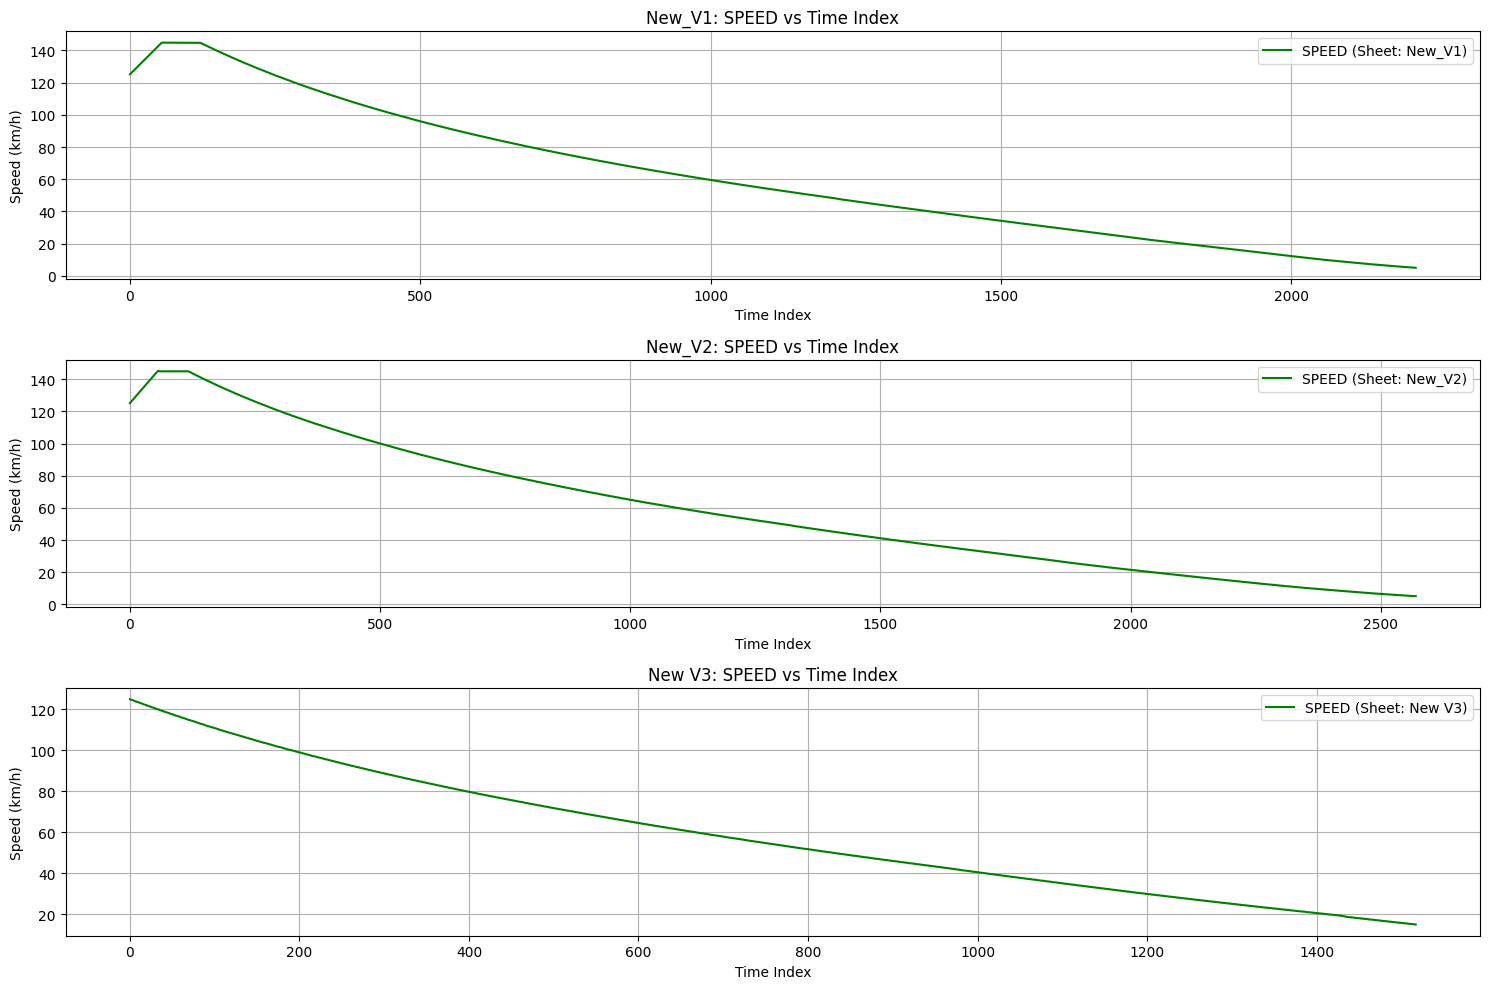

In [47]:
# Initialize the plot
plt.figure(figsize=(15, 10))

# Iterate over the sheets and plot SPEED
for i, (sheet, arrays) in enumerate(data_arrays.items(), start=1):
    # Extract SPEED
    speed = arrays["SPEED"]
    
    # Plot SPEED
    plt.subplot(3, 1, i)
    plt.plot(range(len(speed)), speed, label=f'SPEED (Sheet: {sheet})', color='green')
    plt.title(f'{sheet}: SPEED vs Time Index')
    plt.xlabel('Time Index')
    plt.ylabel('Speed (km/h)')
    plt.legend()
    plt.grid()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


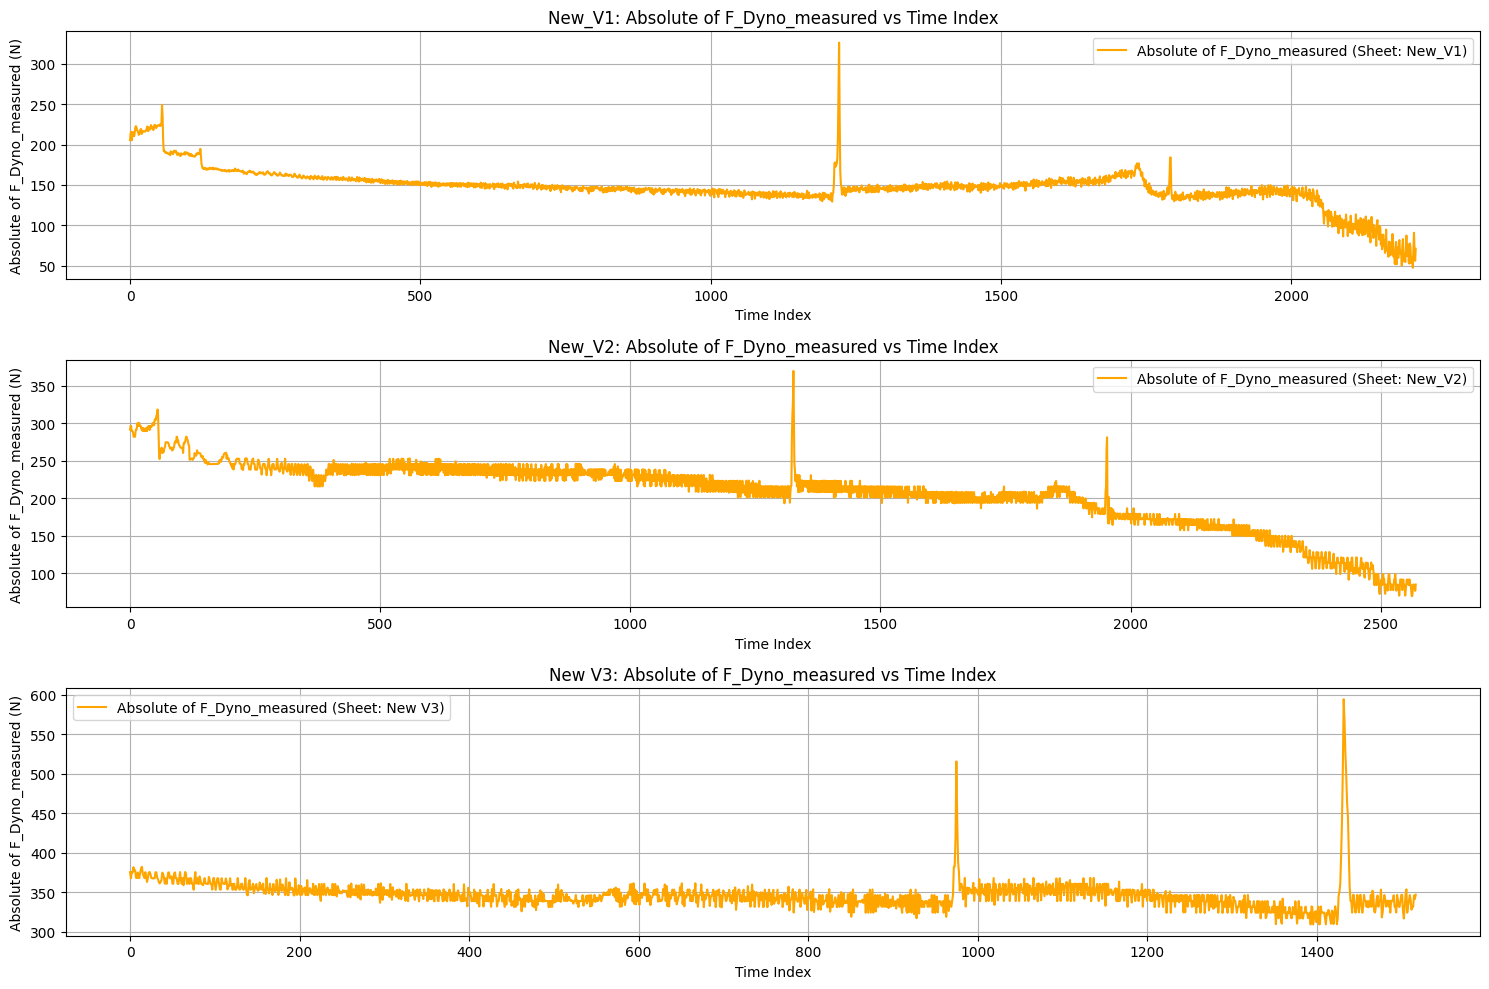

In [48]:
# Initialize the plot
plt.figure(figsize=(15, 10))

# Iterate over the sheets and plot Absolute of F_Dyno_measured
for i, (sheet, arrays) in enumerate(data_arrays.items(), start=1):
    # Extract Absolute of F_Dyno_measured
    absolute_f_dyno_measured = arrays["Absolute of F_Dyno_measured"]
    
    # Plot Absolute of F_Dyno_measured
    plt.subplot(3, 1, i)
    plt.plot(range(len(absolute_f_dyno_measured)), absolute_f_dyno_measured, 
             label=f'Absolute of F_Dyno_measured (Sheet: {sheet})', color='orange')
    plt.title(f'{sheet}: Absolute of F_Dyno_measured vs Time Index')
    plt.xlabel('Time Index')
    plt.ylabel('Absolute of F_Dyno_measured (N)')
    plt.legend()
    plt.grid()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


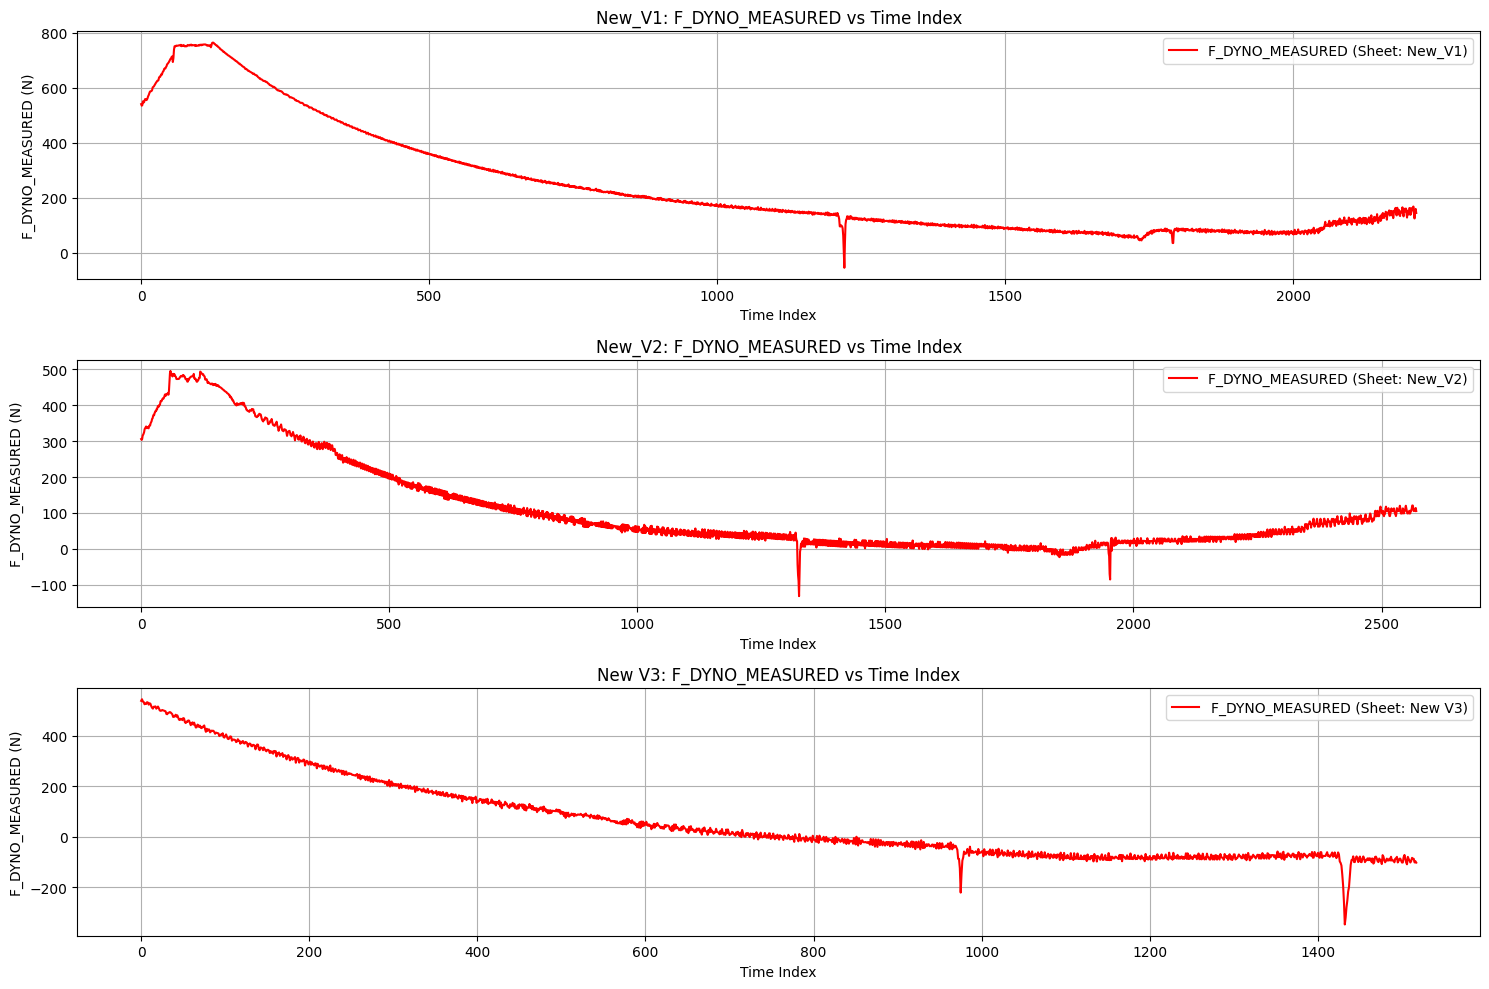

In [49]:
# Initialize the plot
plt.figure(figsize=(15, 10))

# Iterate over the sheets and plot F_DYNO_MEASURED
for i, (sheet, arrays) in enumerate(data_arrays.items(), start=1):
    # Extract F_DYNO_MEASURED
    f_dyno_measured = arrays["Fdyno"]
    
    # Plot F_DYNO_MEASURED
    plt.subplot(3, 1, i)
    plt.plot(range(len(f_dyno_measured)), f_dyno_measured, 
             label=f'F_DYNO_MEASURED (Sheet: {sheet})', color='red')
    plt.title(f'{sheet}: F_DYNO_MEASURED vs Time Index')
    plt.xlabel('Time Index')
    plt.ylabel('F_DYNO_MEASURED (N)')
    plt.legend()
    plt.grid()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


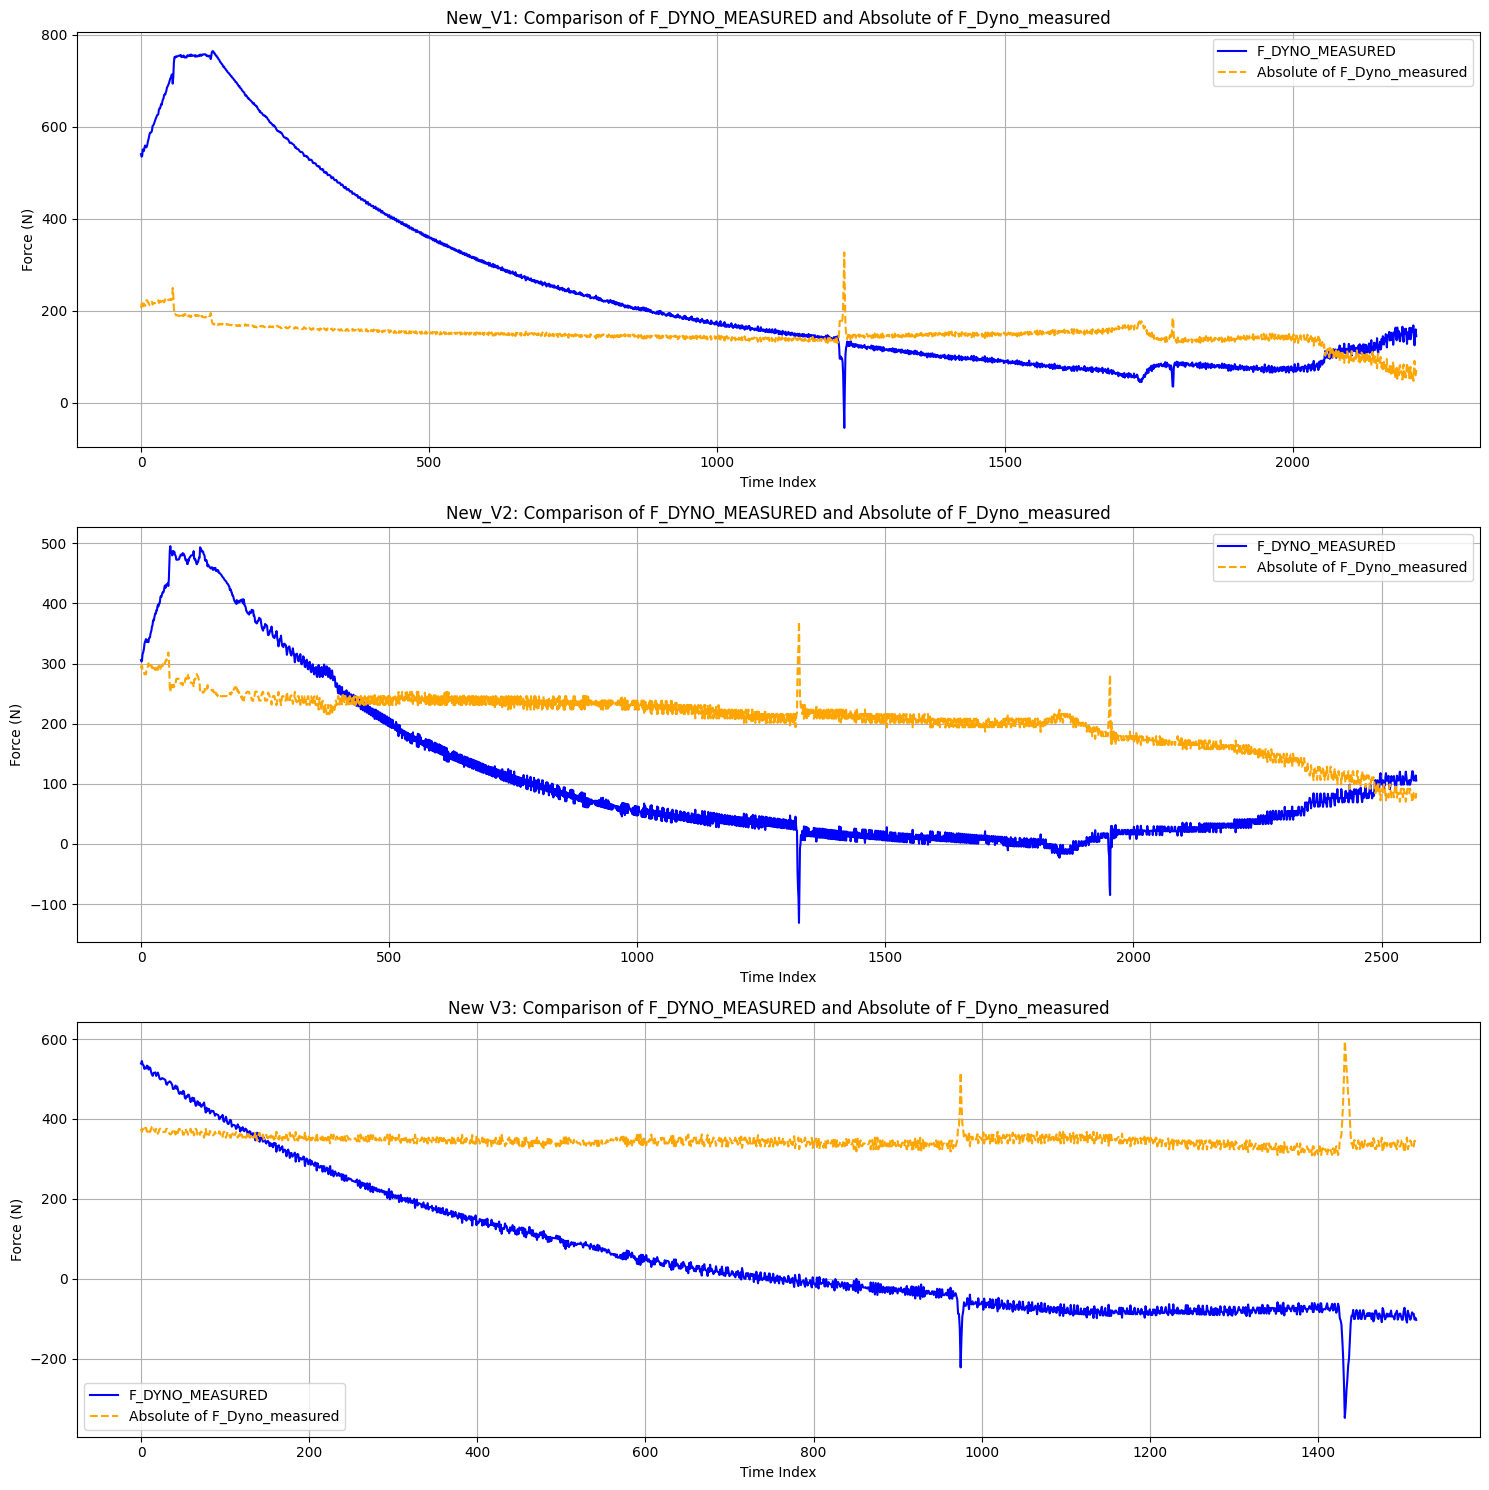

In [50]:
# Initialize the plot
plt.figure(figsize=(15, 15))

# Iterate over the sheets and plot F_DYNO_MEASURED vs Absolute of F_Dyno_measured
for i, (sheet, arrays) in enumerate(data_arrays.items(), start=1):
    # Extract F_DYNO_MEASURED and Absolute of F_Dyno_measured
    f_dyno_measured = arrays["Fdyno"]
    absolute_f_dyno_measured = arrays["Absolute of F_Dyno_measured"]
    
    # Plot comparison
    plt.subplot(3, 1, i)
    plt.plot(range(len(f_dyno_measured)), f_dyno_measured, label='F_DYNO_MEASURED', color='blue')
    plt.plot(range(len(absolute_f_dyno_measured)), absolute_f_dyno_measured, 
             label='Absolute of F_Dyno_measured', color='orange', linestyle='--')
    plt.title(f'{sheet}: Comparison of F_DYNO_MEASURED and Absolute of F_Dyno_measured')
    plt.xlabel('Time Index')
    plt.ylabel('Force (N)')
    plt.legend()
    plt.grid()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


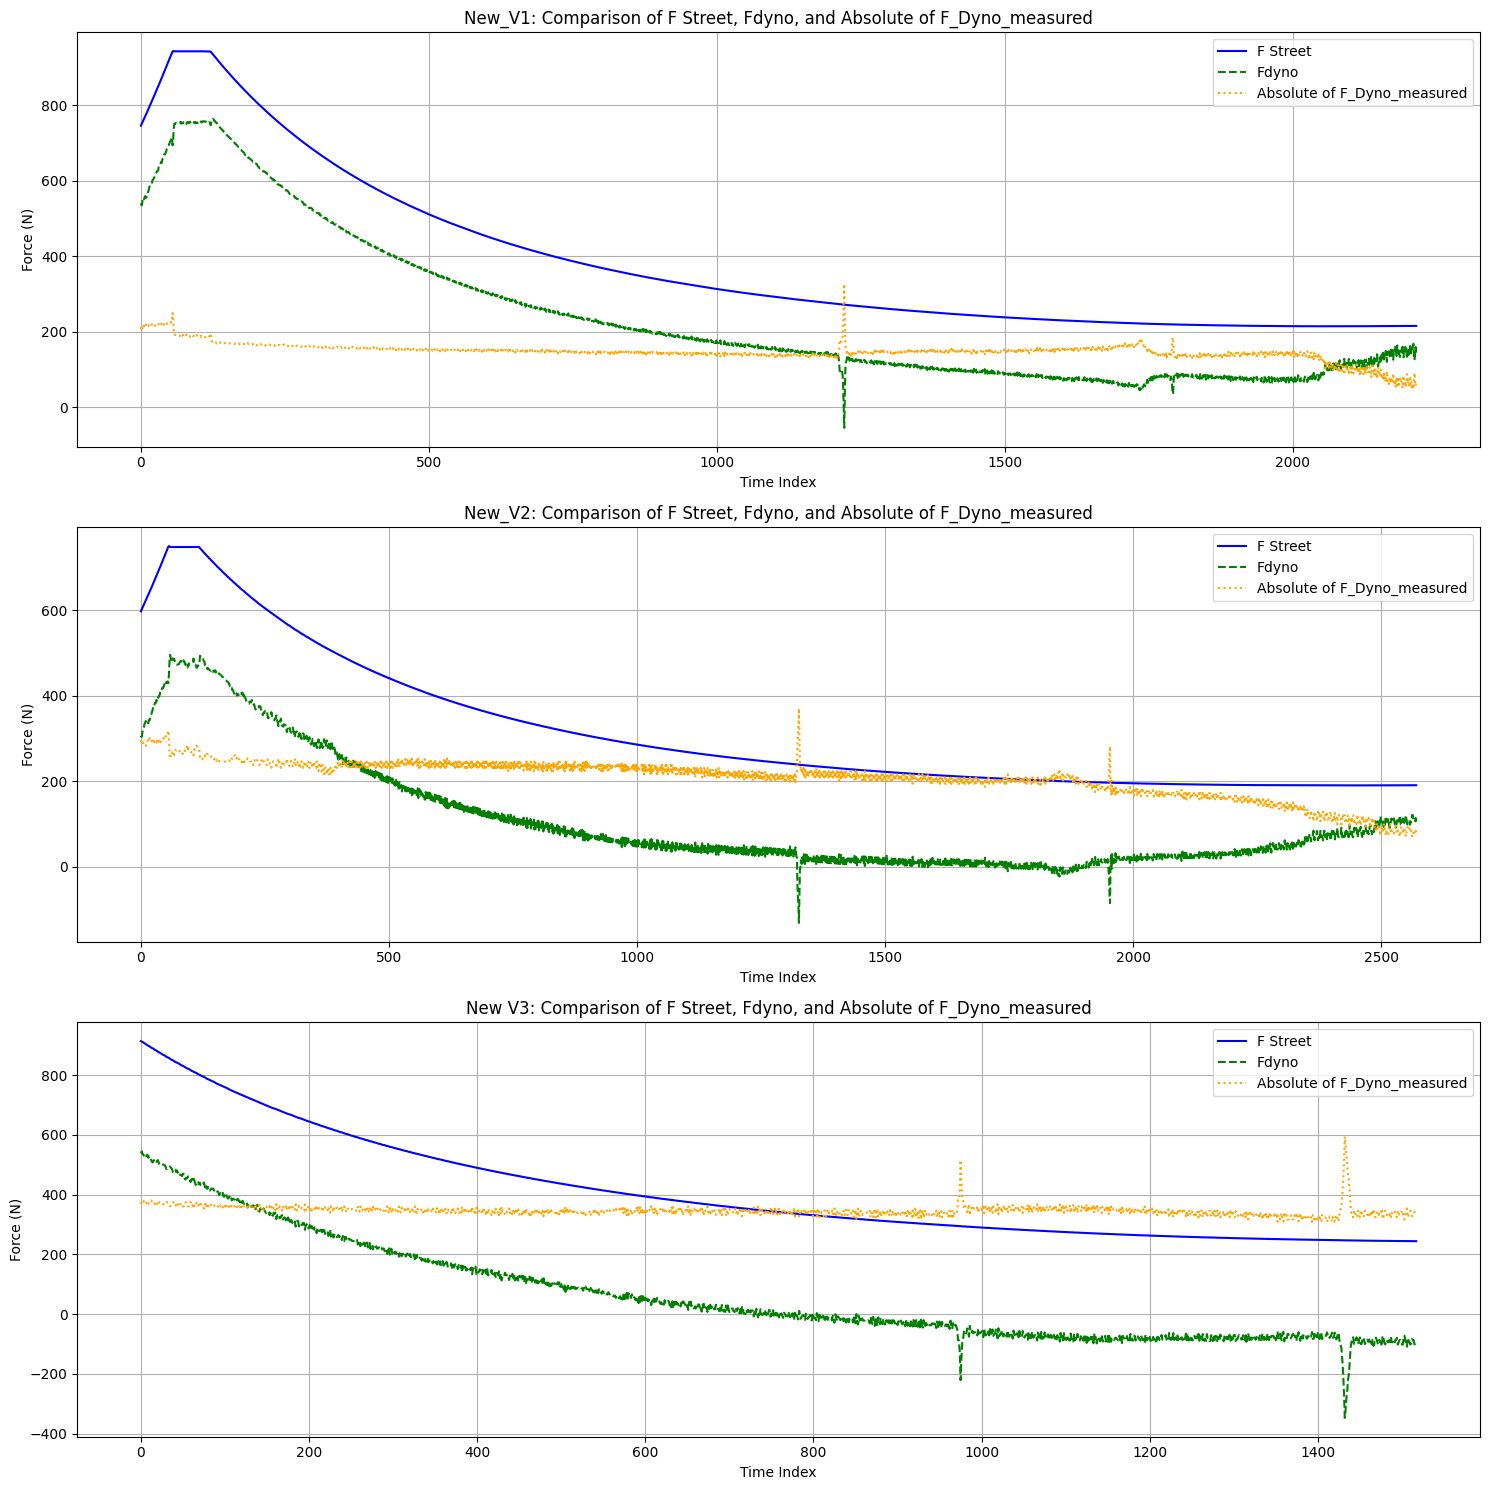

In [51]:
# Initialize the plot
plt.figure(figsize=(15, 15))

# Iterate over the sheets and plot all three variables
for i, (sheet, arrays) in enumerate(data_arrays.items(), start=1):
    # Extract data
    f_street = arrays["F Street"]
    f_dyno = arrays["Fdyno"]
    absolute_f_dyno_measured = arrays["Absolute of F_Dyno_measured"]
    
    # Create a subplot for each sheet
    plt.subplot(3, 1, i)
    plt.plot(range(len(f_street)), f_street, label='F Street', color='blue')
    plt.plot(range(len(f_dyno)), f_dyno, label='Fdyno', color='green', linestyle='--')
    plt.plot(range(len(absolute_f_dyno_measured)), absolute_f_dyno_measured, 
             label='Absolute of F_Dyno_measured', color='orange', linestyle=':')
    plt.title(f'{sheet}: Comparison of F Street, Fdyno, and Absolute of F_Dyno_measured')
    plt.xlabel('Time Index')
    plt.ylabel('Force (N)')
    plt.legend()
    plt.grid()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


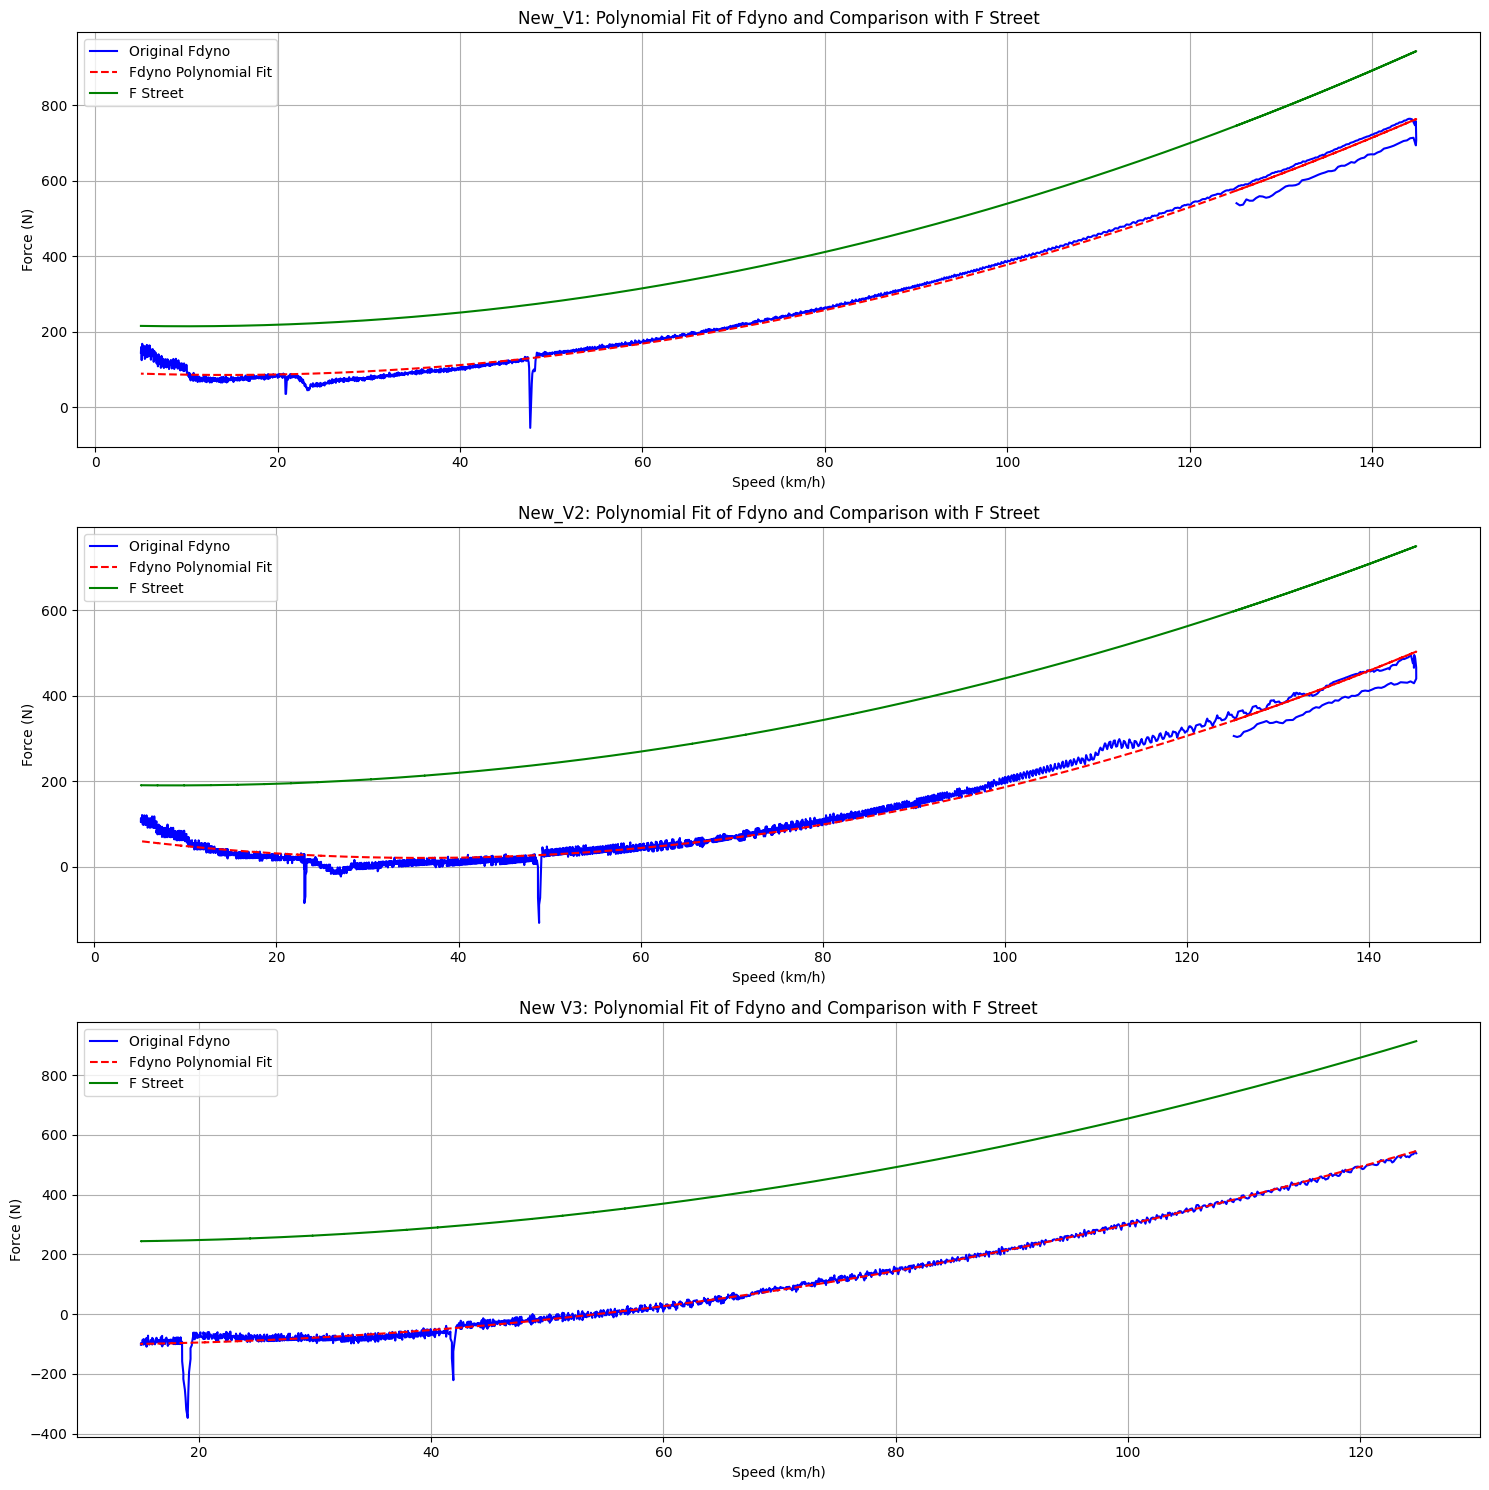

In [52]:
import numpy as np

# Initialize the plot
plt.figure(figsize=(15, 15))

# Iterate over the sheets and perform polynomial fitting and plotting
for i, (sheet, arrays) in enumerate(data_arrays.items(), start=1):
    # Extract data
    speed = arrays["SPEED"]
    f_dyno = arrays["Fdyno"]
    f_street = arrays["F Street"]
    
    # Perform a second-order polynomial fit to Fdyno
    coefficients = np.polyfit(speed, f_dyno, 2)  # Fit: f(x) = ax^2 + bx + c
    poly_fit = np.poly1d(coefficients)
    
    # Generate fitted values
    f_dyno_fit = poly_fit(speed)
    
    # Create a subplot for each sheet
    plt.subplot(3, 1, i)
    plt.plot(speed, f_dyno, label='Original Fdyno', color='blue')
    plt.plot(speed, f_dyno_fit, label='Fdyno Polynomial Fit', color='red', linestyle='--')
    plt.plot(speed, f_street, label='F Street', color='green')
    plt.title(f'{sheet}: Polynomial Fit of Fdyno and Comparison with F Street')
    plt.xlabel('Speed (km/h)')
    plt.ylabel('Force (N)')
    plt.legend()
    plt.grid()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


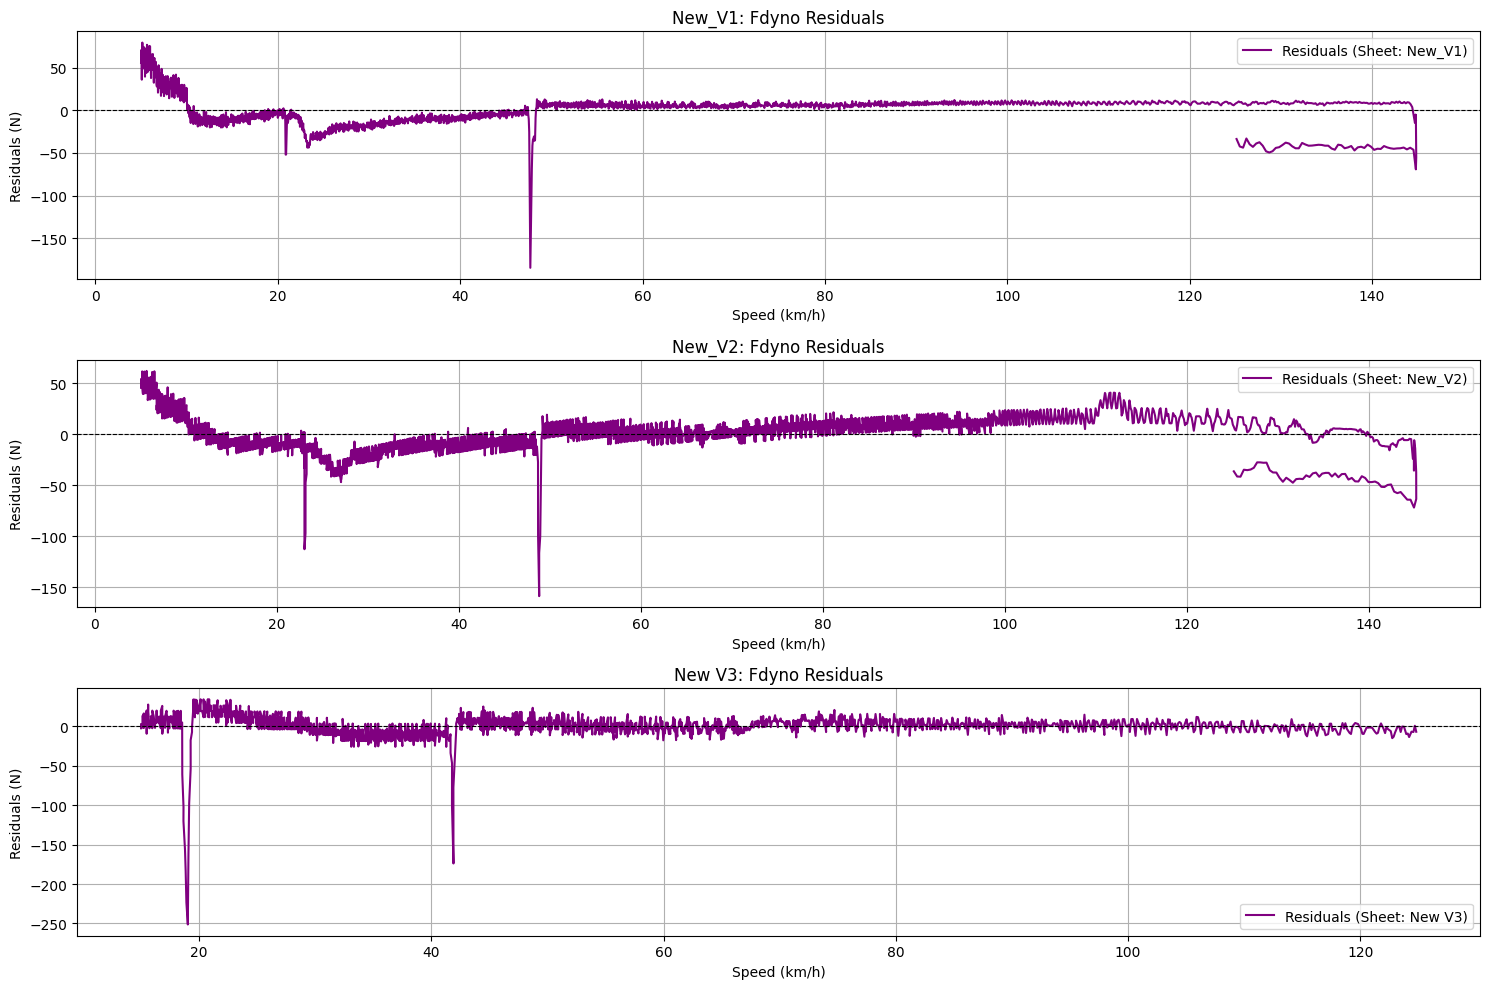

Residuals for New_V1:
Mean: -6.528652712500929e-14, Std Dev: 17.88563653850896

Residuals for New_V2:
Mean: 2.2675461059371722e-13, Std Dev: 19.094697393386408

Residuals for New V3:
Mean: 2.7710230538206806e-15, Std Dev: 17.18012630759444



In [53]:
import numpy as np

# Initialize the plot
plt.figure(figsize=(15, 10))

# Dictionary to store residuals for each sheet
residuals = {}

# Iterate over the sheets and calculate residuals
for i, (sheet, arrays) in enumerate(data_arrays.items(), start=1):
    # Extract data
    speed = arrays["SPEED"]
    f_dyno = arrays["Fdyno"]
    
    # Perform a second-order polynomial fit to Fdyno
    coefficients = np.polyfit(speed, f_dyno, 2)  # Fit: f(x) = ax^2 + bx + c
    poly_fit = np.poly1d(coefficients)
    
    # Calculate fitted values
    f_dyno_fit = poly_fit(speed)
    
    # Calculate residuals (Actual - Fitted)
    residuals[sheet] = f_dyno - f_dyno_fit
    
    # Plot residuals
    plt.subplot(3, 1, i)
    plt.plot(speed, residuals[sheet], label=f'Residuals (Sheet: {sheet})', color='purple')
    plt.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Zero line for reference
    plt.title(f'{sheet}: Fdyno Residuals')
    plt.xlabel('Speed (km/h)')
    plt.ylabel('Residuals (N)')
    plt.legend()
    plt.grid()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# Display residual statistics for verification
for sheet, res in residuals.items():
    print(f"Residuals for {sheet}:")
    print(f"Mean: {np.mean(res)}, Std Dev: {np.std(res)}\n")


In [54]:
import numpy as np

# Dictionary to store the coefficients for each sheet
dyno_coefficients = {}

# Iterate over the sheets to calculate the residuals and fit a polynomial
for sheet, arrays in data_arrays.items():
    # Extract data
    speed = arrays["SPEED"]
    f_dyno = arrays["Fdyno"]
    
    # Perform a second-order polynomial fit to Fdyno
    coefficients = np.polyfit(speed, f_dyno, 2)
    poly_fit = np.poly1d(coefficients)
    
    # Calculate residuals (Actual - Fitted)
    f_dyno_fit = poly_fit(speed)
    residuals = f_dyno - f_dyno_fit
    
    # Fit a polynomial to the residuals
    residual_coefficients = np.polyfit(speed, residuals, 2)  # Fit: Residuals = F1*x^2 + F2*x + F3
    dyno_coefficients[sheet] = residual_coefficients

# Display the dyno coefficients for each sheet
for sheet, coeffs in dyno_coefficients.items():
    print(f"Dyno coefficients for {sheet}:")
    print(f"F1 (x^2 term): {coeffs[0]:.4f}")
    print(f"F2 (x term): {coeffs[1]:.4f}")
    print(f"F3 (constant term): {coeffs[2]:.4f}\n")


Dyno coefficients for New_V1:
F1 (x^2 term): -0.0000
F2 (x term): -0.0000
F3 (constant term): 0.0000

Dyno coefficients for New_V2:
F1 (x^2 term): 0.0000
F2 (x term): -0.0000
F3 (constant term): 0.0000

Dyno coefficients for New V3:
F1 (x^2 term): 0.0000
F2 (x term): -0.0000
F3 (constant term): 0.0000

